In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")

In [3]:
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")

print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

Training dataset shape: (370515, 32)
Testing dataset shape: (123505, 32)
Training labels: (370515, 2)
Testing labels: (123505, 2)


In [4]:
y_train = y_train['label']
y_test = y_test['label']

print(y_train.unique())

['normal' 'dos' 'r2l' 'probe' 'u2r']


In [5]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# training
from sklearn.svm import SVC 

model = SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
print(f"Training score: {model.score(X_train, y_train)}")
print(f"Testing score: {model.score(X_test, y_test)}")

Training score: 0.9990445730942067
Testing score: 0.9989717015505445


In [8]:
y_predicted = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.97      0.98      1056
         r2l       0.94      0.86      0.90       279
         u2r       0.82      0.75      0.78        12

    accuracy                           1.00    123505
   macro avg       0.95      0.92      0.93    123505
weighted avg       1.00      1.00      1.00    123505



In [10]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

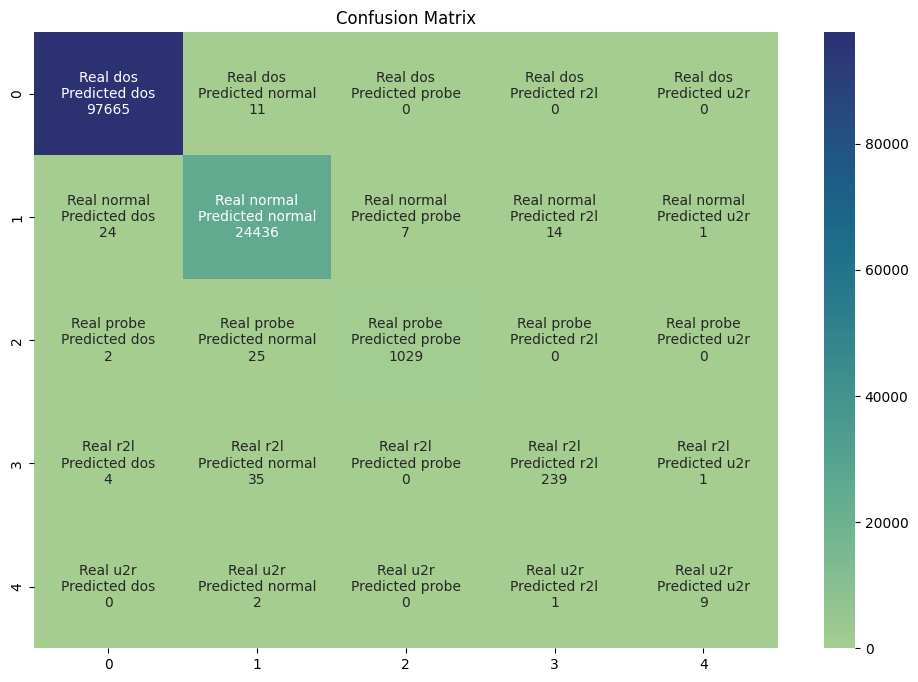

In [11]:
# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


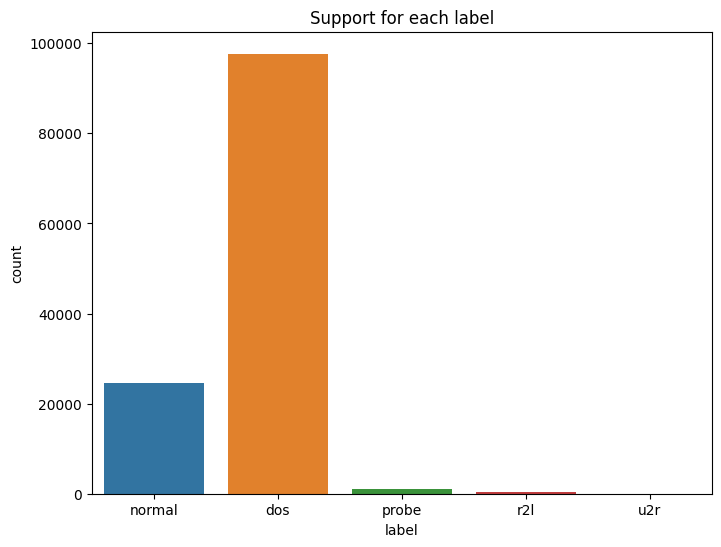


dos       0.790867
normal    0.198227
probe     0.008550
r2l       0.002259
u2r       0.000097
Name: label, dtype: float64

dos       97676
normal    24482
probe      1056
r2l         279
u2r          12
Name: label, dtype: int64


In [12]:
plt.figure(figsize=(8,6))
plt.title("Support for each label")
sns.countplot(y_test, )
plt.show()

print(f"\n{y_test.value_counts() / y_test.shape[0]}\n\n{y_test.value_counts()}")

In [ ]:
#Conclusion
#Excellent overall prediction results:

#1.00 accuracy
#1.00 precision weighted avg
#1.00 recall weighted avg
#1.00 f1-score weighted avg
#Good results on the recall of R2L and U2R (resp. 86% and 75%).